LINK DATASET : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 36% 17.0M/47.0M [00:00<00:00, 176MB/s]
100% 47.0M/47.0M [00:00<00:00, 250MB/s]


In [3]:
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d dataset_directory

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: dataset_directory/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating:

In [4]:
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d shoe_sandal_boot

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: shoe_sanda

## Import Library

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [6]:
path = '/content/dataset_directory/Shoe vs Sandal vs Boot Dataset'

In [7]:
import os

In [8]:
image = os.listdir(path)
image

['Shoe', 'Boot', 'Sandal']

## Mengatur Path Menjadi Train, Validation, dan Test

In [9]:
train_dir = '/content/dataset_directory/Shoe vs Sandal vs Boot Dataset'
validation_dir = '/content/dataset_directory/Shoe vs Sandal vs Boot Dataset'
test_dir = '/content/dataset_directory/Shoe vs Sandal vs Boot Dataset'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Split Dataset Menjadi Train, Val, dan Test

DATA TRAIN

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 15000 images belonging to 3 classes.


DATA VALIDATION

In [13]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 15000 images belonging to 3 classes.


DATA SET

In [14]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 15000 images belonging to 3 classes.


## **Membuat Model Sequential**
***

In [15]:
model = Sequential()

## **Menggunakan Pre-Trained Model VGG16**
***

In [16]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


## **Menggunakan Optimizer, Loss, dan Metrics**

In [17]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## **Callbacks**
***

In [18]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

## **Latih Model**
***

In [24]:
history = model.fit(
    train_generator,
    epochs=6,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/6
469/469 [==============================] - 132s 281ms/step - loss: -794699.5625 - accuracy: 0.3847 - val_loss: -1037292.3125 - val_accuracy: 0.4519 - lr: 0.0010
Epoch 2/6
469/469 [==============================] - 141s 300ms/step - loss: -879237.4375 - accuracy: 0.3839 - val_loss: -1148729.2500 - val_accuracy: 0.4534 - lr: 0.0010
Epoch 3/6
469/469 [==============================] - 129s 276ms/step - loss: -982324.4375 - accuracy: 0.3862 - val_loss: -1267514.0000 - val_accuracy: 0.4530 - lr: 0.0010
Epoch 4/6
469/469 [==============================] - 129s 274ms/step - loss: -1073274.0000 - accuracy: 0.3853 - val_loss: -1391993.6250 - val_accuracy: 0.4520 - lr: 0.0010
Epoch 5/6
469/469 [==============================] - 129s 275ms/step - loss: -1171326.6250 - accuracy: 0.3867 - val_loss: -1520128.1250 - val_accuracy: 0.4518 - lr: 0.0010
Epoch 6/6
469/469 [==============================] - 130s 277ms/step - loss: -1290535.3750 - accuracy: 0.3862 - val_loss: -1655188.5000 - val_a

## **Evaluasi Model**
***

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

469/469 [==============================] - 31s 66ms/step - loss: -1655188.2500 - accuracy: 0.4515
Akurasi pada data test: 0.45


## Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [26]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

## Grafik Accuracy

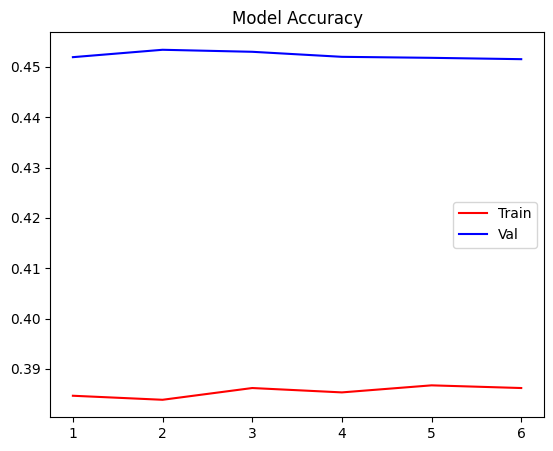

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

## Grafika Loss

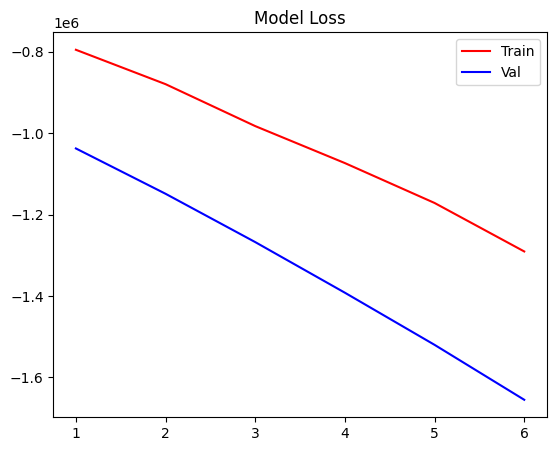

In [28]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

## Menampilkan Gambar

In [30]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [31]:
path_gambar = '/content/shoe_sandal_boot/Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg'

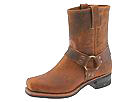

In [32]:
gambar = load_img(path_gambar)
gambar

In [34]:
bright = random_brightness(gambar, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum augmentasi')

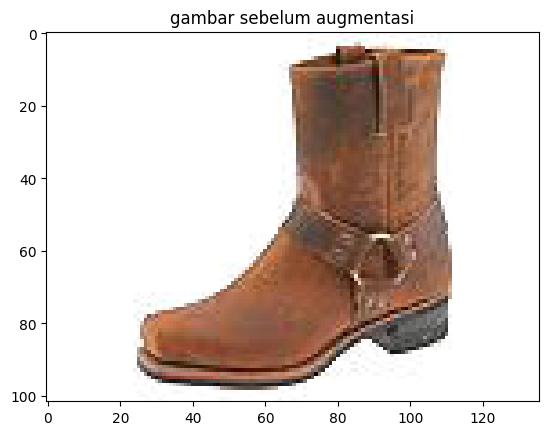

In [35]:
plt.imshow(gambar)
plt.title('gambar sebelum augmentasi')